# Introduction to Agent-Based Models (ABMs)

Agent-Based Models (ABMs) are a class of computational models for simulating the interactions of agents with each other and with their environment. These models are particularly powerful for understanding complex systems from the bottom up, where the behavior of the whole system emerges from the interactions of individual components.

## What are ABMs?
An ABM consists of a population of agents, each with its own properties and rules of behavior. Agents interact with each other and with their environment according to these rules, leading to emergent system dynamics. ABMs are used across various fields, including biology, ecology, economics, and social sciences, to model complex, dynamic systems.

## Python Classes
In Python, classes are used to create objects. A class defines the properties and behaviors of the objects it creates, allowing for encapsulation and reusability of code. Python's class mechanism adds classes with a minimum of new syntax and semantics, making it easy to create and use objects in your simulations.

In [60]:
class Agent:
    def __init__(self, properties):
        self.properties = properties

    def behavior(self):
        pass

## Applications in Microbiome Modeling
In microbiome research, ABMs can simulate the behavior of individual microorganisms or groups thereof within a community. These models can help researchers understand phenomena such as microbial interactions, community dynamics, antibiotic resistance, and the impact of environmental changes on microbial communities.

## Example applications include:
- Simulating the spread of antibiotic resistance genes within microbial communities.
- Modeling the interactions between different microbial species and their environment.
- Understanding the impact of spatial structure on microbial community dynamics.'
  
## Quorum Sensing: A Key Mechanism in Microbial Communities
Quorum sensing is a mechanism of cell-to-cell communication that enables bacteria to coordinate their behavior based on the local density of their population. Through the production, release, and detection of chemical signal molecules called autoinducers, bacteria can regulate gene expression collectively, leading to behaviors such as biofilm formation, virulence, and bioluminescence.

Quorum sensing is essential for understanding microbial community behaviors, making it an exciting area of study within microbiome modeling. By simulating quorum sensing in ABMs, researchers can gain insights into how microbial communities regulate their behavior in response to environmental cues and changes in population density.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import io
import base64
import imageio
from IPython.display import HTML

In [62]:
class MicrobialAgent:
    def __init__(self, position):
        self.position = np.array(position)
        self.autoinducer_production = np.random.uniform(0.001, 0.05)  # Production rate varies between agents.
        self.autoinducer_threshold = np.random.uniform(10.0, 3.0)  # Sensitivity to quorum sensing varies.
        self.autoinducer_concentration = 0  # Initial concentration of autoinducers.
        self.deactivation_threshold = 0.5  # Example deactivation threshold
        self.autoinducer_concentration = 0
        self.activated = False  # Indicates if the agent is activated via quorum sensing.
        self.history = {'position': [self.position.copy()], 'activated': [self.activated], 'concentration': [self.autoinducer_concentration]}

    def move(self, boundary):
        """Agents move randomly within the environment, confined by the specified boundary."""
        movement = np.random.uniform(-0.5, 0.5, size=2)  # Determines the direction and distance of movement.
        self.position += movement
        self.position = np.clip(self.position, 0, boundary)  # Keeps the agent within the environment boundaries.

    def produce_autoinducers(self):
        """Simulates the production of autoinducers by the agent."""
        self.autoinducer_concentration += self.autoinducer_production

    def sense_environment(self, microbial_community):
        nearby_agents = [microbe for microbe in microbial_community if np.linalg.norm(self.position - microbe.position) < 2.0]
        sensed_concentration = sum(microbe.autoinducer_concentration for microbe in nearby_agents)
        quorum_sensing = sensed_concentration >= self.autoinducer_threshold
        # self.act(quorum_sensing, sensed_concentration)
        return quorum_sensing, sensed_concentration 

    def act(self, quorum_sensing, sensed_concentration):
        """Adjusts activation state based on quorum sensing signal and current sensed concentration."""
        if quorum_sensing and not self.activated:
            # self.autoinducer_production += 0.1  # Example of increasing production upon activation
            self.activated = True
        elif not quorum_sensing and self.activated and sensed_concentration < self.deactivation_threshold:
            # Deactivate if currently activated but sensed concentration falls below deactivation threshold
            self.activated = False

    def update_history(self):
        """Updates the agent's history for position and activation state."""
        self.history['position'].append(self.position.copy())
        self.history['activated'].append(self.activated)
        self.history['concentration'].append(self.autoinducer_concentration)



def simulate_microbial_community(steps=100, community_size=100, environment_size=10):
    microbial_community = [
        MicrobialAgent(position=np.random.rand(2) * environment_size) for _ in range(community_size)]

    for step in range(steps):
        for microbe in microbial_community:
            microbe.move(environment_size)
            microbe.produce_autoinducers()
        
        for microbe in microbial_community:
            quorum_sensing, sensed_concentration  = microbe.sense_environment(microbial_community)
            microbe.act(quorum_sensing, sensed_concentration)
            microbe.update_history()
            
    return microbial_community


def create_gif(microbial_community, environment_size, filename="simulation.gif"):
    images = []
    steps = len(microbial_community[0].history['position'])
    
    # Define a minimum figure size to ensure visibility
    fig_scale = 0.4  # Adjust this value to change figure size proportionally
    fig_size = (environment_size * fig_scale, environment_size * fig_scale)
    
    for step in range(steps):
        fig, ax = plt.subplots(figsize=fig_size)
        ax.set_xlim(0, environment_size)
        ax.set_ylim(0, environment_size)
        ax.set_aspect('equal')  # Maintain aspect ratio
        for microbe in microbial_community:
            pos = microbe.history['position'][step]
            color = 'ro' if microbe.history['activated'][step] else 'bo'
            ax.plot(pos[0], pos[1], color)  # Use color based on activation state
        
        # Save figure to buffer
        buf = io.BytesIO()
        plt.savefig(buf, format='png', dpi=120, bbox_inches='tight')
        buf.seek(0)
        images.append(imageio.imread(buf))
        buf.close()
        plt.close(fig)
    
    # Create and save the GIF
    imageio.mimsave(filename, images, duration=0.1, loop=0)

    # Display the GIF in a Jupyter notebook
    with open(filename, 'rb') as file:
        data = file.read()
        data_url = 'data:image/gif;base64,' + base64.b64encode(data).decode()
    display(HTML(f'<img src="{data_url}" alt="Microbial Simulation" style="max-width:100%;"/>'))


def plot_microbial_community_dynamics(community):
    """
    Plots the dynamics of the microbial community simulation using the community output,
    including the number of activated agents and the average autoinducer concentration over time.

    Parameters:
    - community: A list of MicrobialAgent objects after running the simulation.
    """
    steps = len(community[0].history['activated'])  # Assuming all agents have the same length of history.
    activated_counts = []
    avg_autoinducer_concentrations = []  # Store average concentrations per step.

    for step in range(steps):
        activated_count = sum(agent.history['activated'][step] for agent in community)
        activated_counts.append(activated_count)

        # Now using the tracked concentration history for accurate per-step averages.
        step_concentration = sum(agent.history['concentration'][step] for agent in community) / len(community)
        avg_autoinducer_concentrations.append(step_concentration)

    # Plotting setup
    fig, ax1 = plt.subplots()

    # Plot for the number of activated agents
    color = 'tab:red'
    ax1.set_xlabel('Simulation Step')
    ax1.set_ylabel('Number of Activated Agents', color=color)
    ax1.plot(activated_counts, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Plot for the average autoinducer concentration
    ax2 = ax1.twinx()  # Creates a second y-axis sharing the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('Avg Autoinducer Concentration', color=color)
    ax2.plot(avg_autoinducer_concentrations, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # Adjust layout to prevent overlap and clipping
    plt.title('Microbial Community Dynamics')
    plt.show()



In [63]:
community_sparse = simulate_microbial_community(steps=100, community_size=15, environment_size=12)

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_40107/2548685269.py:85: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))



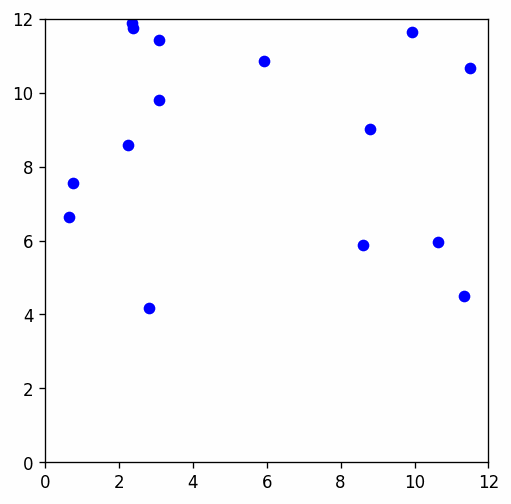

In [64]:
create_gif(community_sparse, environment_size=12, filename="microbial_simulation.gif")

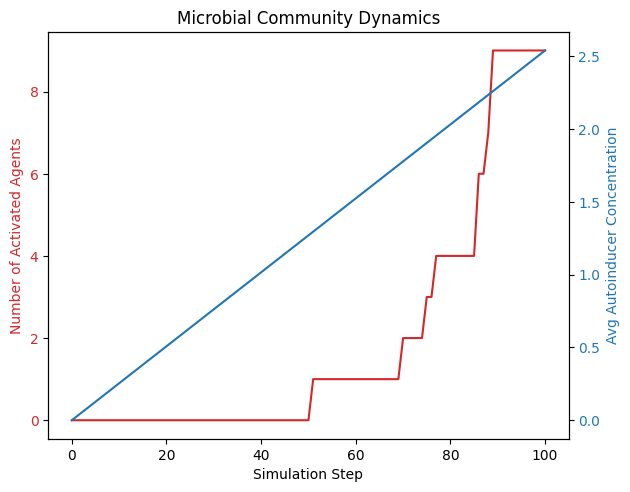

In [65]:
plot_microbial_community_dynamics(community_sparse)

In [66]:
community_small = simulate_microbial_community(steps=100, community_size=100, environment_size=5)

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_40107/2548685269.py:85: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))



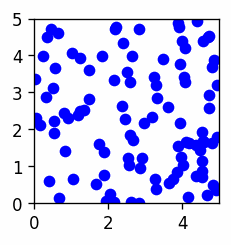

In [67]:
# Create the animation
create_gif(community_small, environment_size=5, filename="microbial_simulation.gif")

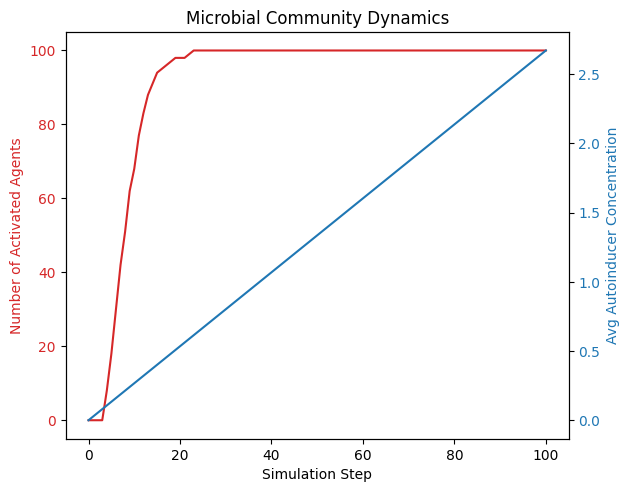

In [68]:
plot_microbial_community_dynamics(community_small)

In [69]:
community_large = simulate_microbial_community(steps=100, community_size=100, environment_size=20)


/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_40107/2548685269.py:85: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(buf))



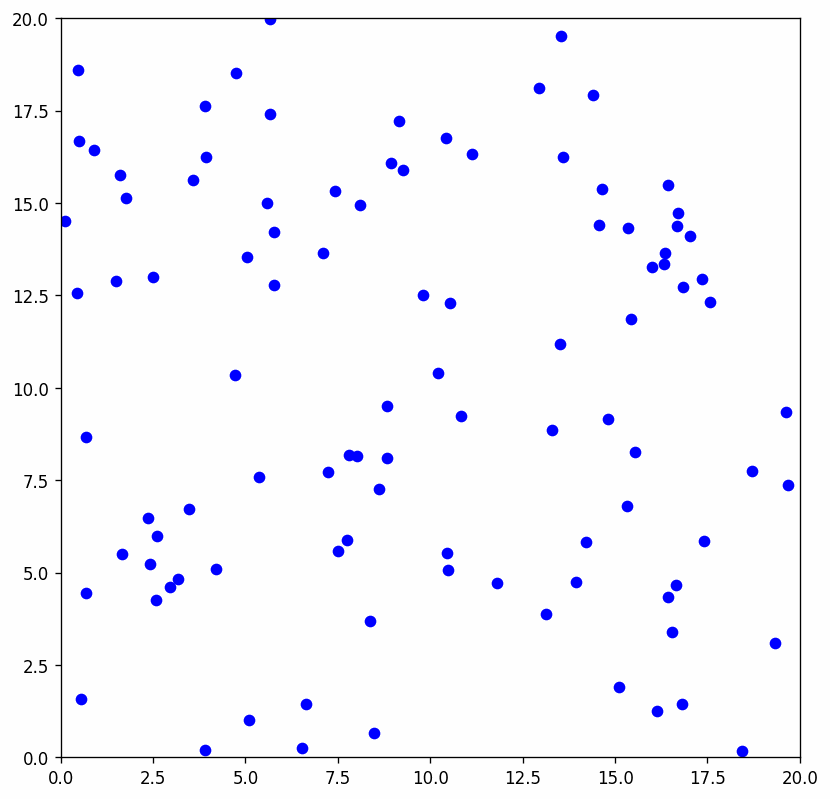

In [70]:
# Create the animation
create_gif(community_large, environment_size=20, filename="microbial_simulation.gif")


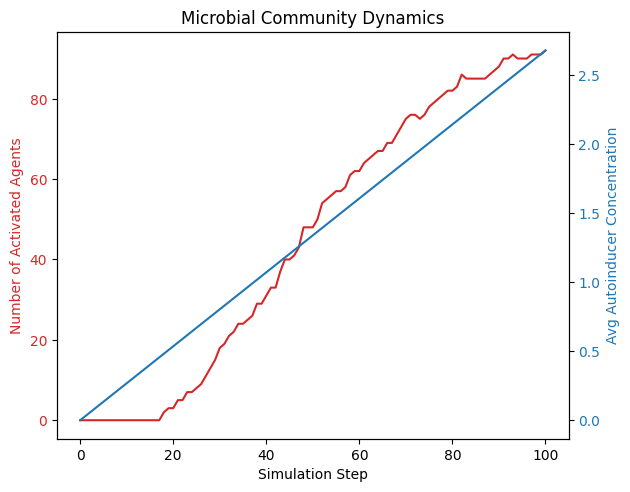

In [71]:
plot_microbial_community_dynamics(community_large)